## **1. Tải bộ dữ liệu**


In [ ]:
!gdown --id 1-2z8eDpuE1qpnzFr9W8aKrrrctt9LST0

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-2z8eDpuE1qpnzFr9W8aKrrrctt9LST0
To: /content/fer_2013.zip
100% 64.1M/64.1M [00:00<00:00, 118MB/s]


In [ ]:
!unzip fer_2013.zip 

Streaming output truncated to the last 5000 lines.
 extracting: fer_2013/train/angry/Training_25806207.jpg  
 extracting: fer_2013/train/angry/Training_61140206.jpg  
 extracting: fer_2013/train/angry/Training_24737960.jpg  
 extracting: fer_2013/train/angry/Training_41062954.jpg  
 extracting: fer_2013/train/angry/Training_62704105.jpg  
 extracting: fer_2013/train/angry/Training_84772308.jpg  
 extracting: fer_2013/train/angry/Training_52788224.jpg  
 extracting: fer_2013/train/angry/Training_55923353.jpg  
 extracting: fer_2013/train/angry/Training_71282551.jpg  
 extracting: fer_2013/train/angry/Training_39764127.jpg  
 extracting: fer_2013/train/angry/Training_9436506.jpg  
 extracting: fer_2013/train/angry/Training_72989732.jpg  
 extracting: fer_2013/train/angry/Training_47170134.jpg  
 extracting: fer_2013/train/angry/Training_83320847.jpg  
 extracting: fer_2013/train/angry/Training_12513174.jpg  
 extracting: fer_2013/train/angry/Training_51002390.jpg  
 extracting: fer_2013/

## **2. Đọc bộ dữ liệu**

### 2.1. Import các thư viện cần thiết

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

### 2.2. Khai báo các biến chứa dữ liệu train và val

In [ ]:
fer2013_path = './fer_2013' # Đường dẫn đến folder dataset
train_fer2013_path = os.path.join(fer2013_path, 'train') # Đường dẫn đến folder dataset train
val_fer2013_path = os.path.join(fer2013_path, 'val') # Đường dẫn đến folder dataset val

BATCH_SIZE = 32
IMG_HEIGHT = 64
IMG_WIDTH = 64
RANDOM_SEED = 1

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_fer2013_path, # Đường dẫn đến bộ train
    seed=RANDOM_SEED, # Cài đặt random seed cho việc shuffle và các phép transform (nếu có)
    image_size=(IMG_HEIGHT, IMG_WIDTH), # Cài đặt kích thước ảnh
    shuffle=True, # Bật chế độ shuffle dataset
    batch_size=BATCH_SIZE, # Cài đặt batch size
    color_mode='grayscale' # Đọc ảnh theo định dạng ảnh mức xám
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_fer2013_path, # Đường dẫn đến bộ val
    seed=RANDOM_SEED, # Cài đặt random seed cho các phép transform (nếu có)
    image_size=(IMG_HEIGHT, IMG_WIDTH), # Cài đặt kích thước ảnh
    batch_size=BATCH_SIZE, # Cài đặt batch size
    color_mode='grayscale' # Đọc ảnh theo định dạng ảnh mức xám
)

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


### 2.3. Visualize một số mẫu dữ liệu

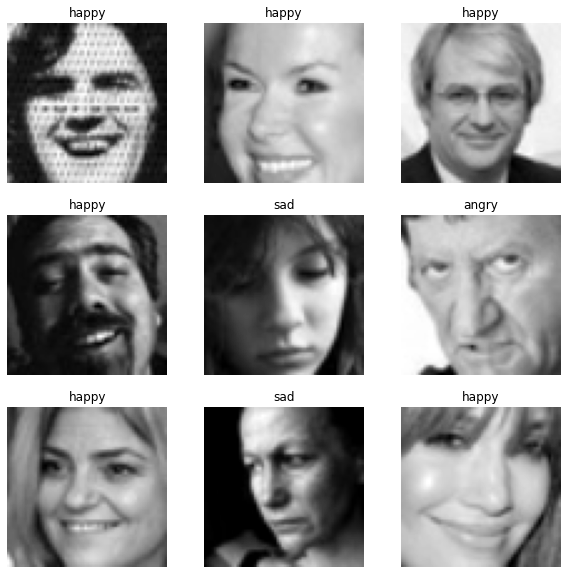

In [ ]:
class_names = train_ds.class_names # Lấy danh sách tên của các class trong bộ dữ liệu
n_classes = len(class_names) # Lấy số lượng class

plt.figure(figsize=(10, 10)) # Cài đặt kích thước khung hình
for images, labels in train_ds.take(1): # Duyệt qua 1 batch của bộ train
    for i in range(9): # Duyệt qua 9 mẫu dữ liệu trong 1 batch
        ax = plt.subplot(3, 3, i + 1) # Khởi tạo khung hình nhỏ cho 1 mẫu dữ liệu
        img = images[i].numpy().squeeze(axis=-1).astype("uint8") # Đọc ảnh của mẫu dữ liệu i, xóa dimension tại vị trí -1, chuyển kiểu dữ liệu sang dạng uint8
        label = class_names[labels[i]] # Đọc label của mẫu dữ liệu i
        plt.imshow(img, cmap='gray') # Show ảnh lên khung hình đã tạo
        plt.title(label) # Đặt title (dòng chữ trên hình) là label
        plt.axis("off") # Tắt hiện khung giá trị trục x, y

plt.show() # Hiển thị 9 khung ảnh nhỏ

## **3. Xây dựng mô hình phân loại ảnh**

In [ ]:
# Khai báo hàm xây dựng mô hình phân lớp
def classification_model(n_classes, input_shape, initializer, activation='relu'):
    ### BẮT ĐẦU CODE TẠI ĐÂY ###
    model = tf.keras.Sequential([
        tf.keras.Input(input_shape), # Input layer. Có thể sử dụng: tf.keras.layers.Flatten(input_shape) để bỏ bớt tf.keras.Input
        tf.keras.layers.Flatten(), # Layer flatten ảnh thành vector 1D
        tf.keras.layers.Dense(256, activation=activation, kernel_initializer=initializer), # Hidden layer 1 với 256 nodes
        tf.keras.layers.Dense(n_classes, activation='softmax', kernel_initializer=initializer) # Output layer
    ])
    ### KẾT THÚC CODE TẠI ĐÂY ###

    return model

## **4. Khai báo siêu tham số và một số cài đặt khác**

In [ ]:
# Cấu hình các tham số tối ưu cho việc đọc dữ liệu
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Khai báo một số giá trị siêu tham số
input_shape = (IMG_HEIGHT, IMG_WIDTH)
EPOCHS = 200
LR = 1e-4

In [ ]:
# Khai báo một list dùng để chứa các model.history
all_history = []

## **5. Huấn luyện các mô hình**

### 5.1. Zeros

In [ ]:
initializer = tf.keras.initializers.Zeros() # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1048832   
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 13s 12ms/step - loss: 1.9353 - accuracy: 0.2499 - val_loss: 1.9256 - val_accuracy: 0.2471
Epoch 2/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9163 - accuracy: 0.2513 - val_loss: 1.9086 - val_accuracy: 0.2471
Epoch 3/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9003 - accuracy: 0.2513 - val_loss: 1.8943 - val_accuracy: 0.2471
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 1.8868 - accuracy: 0.2513 - val_loss: 1.8822 - val_accuracy: 0.2471
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 1.8753 - accuracy: 0.2513 - val_loss: 1.8719 - val_accuracy: 0.2471
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 1.8656 - accuracy: 0.2513 - val_loss: 1.8631 - val_accuracy: 0.2471
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 1.8573 - accuracy: 0.2513 - val_loss: 1.8557 - val_accuracy: 0.24

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('zeros', model.history.history))

### 5.2. Ones

In [ ]:
initializer = tf.keras.initializers.Ones() # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1048832   
                                                                 
 dense_3 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 3s 3ms/step - loss: 5969.5088 - accuracy: 0.1731 - val_loss: 4057.9905 - val_accuracy: 0.2471
Epoch 2/200
898/898 [==============================] - 3s 3ms/step - loss: 5047.7017 - accuracy: 0.1767 - val_loss: 4236.2036 - val_accuracy: 0.1718
Epoch 3/200
898/898 [==============================] - 3s 3ms/step - loss: 4504.3008 - accuracy: 0.1735 - val_loss: 3506.1970 - val_accuracy: 0.1737
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 3705.7249 - accuracy: 0.1749 - val_loss: 2934.6958 - val_accuracy: 0.1737
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 3648.2629 - accuracy: 0.1690 - val_loss: 4039.5759 - val_accuracy: 0.1718
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 2916.7659 - accuracy: 0.1717 - val_loss: 2296.4934 - val_accuracy: 0.1737
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 2426.1633 - accuracy: 0.1728 - 

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('ones', model.history.history))

### 5.3. Constant (c = 1e10)

In [ ]:
initializer = tf.keras.initializers.Constant(1e10) # Nhập initializer muốn sử dụng tại đây
model = classification_model(n_classes, input_shape, initializer) # Gọi biến khởi tạo mô hình
model.summary() # Hiển thị thông tin mô hình đã khởi tạo

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1048832   
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 1,050,631
Trainable params: 1,050,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cấu hình một số thông tin cho mô hình
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR), # Sử dụng optimizer Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Sử dụng hàm loss SparseCategorialCrossEntropy
    metrics=['accuracy'] # Sử dụng thêm độ đô đánh giá Accuracy
)

In [ ]:
# Thực hiện huấn luyện
model.fit( 
    train_ds, # Huấn luyện với bộ train_ds
    validation_data=val_ds, # Đánh giá trên bộ val_ds
    epochs=EPOCHS # Huấn luyện với số lần lặp = EPOCHS
)

Epoch 1/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9459 - accuracy: 0.1390 - val_loss: 1.9459 - val_accuracy: 0.1333
Epoch 2/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9459 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1333
Epoch 3/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9459 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1333
Epoch 4/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9459 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1333
Epoch 5/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9459 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1333
Epoch 6/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9459 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1333
Epoch 7/200
898/898 [==============================] - 3s 3ms/step - loss: 1.9459 - accuracy: 0.1389 - val_loss: 1.9459 - val_accuracy: 0.1333

In [ ]:
# Đưa thông tin history của mô hình đã huấn luyện vào danh sách all_history
all_history.append(('1e10', model.history.history))

## **6. Trực quan hóa kết quả các mô hình**

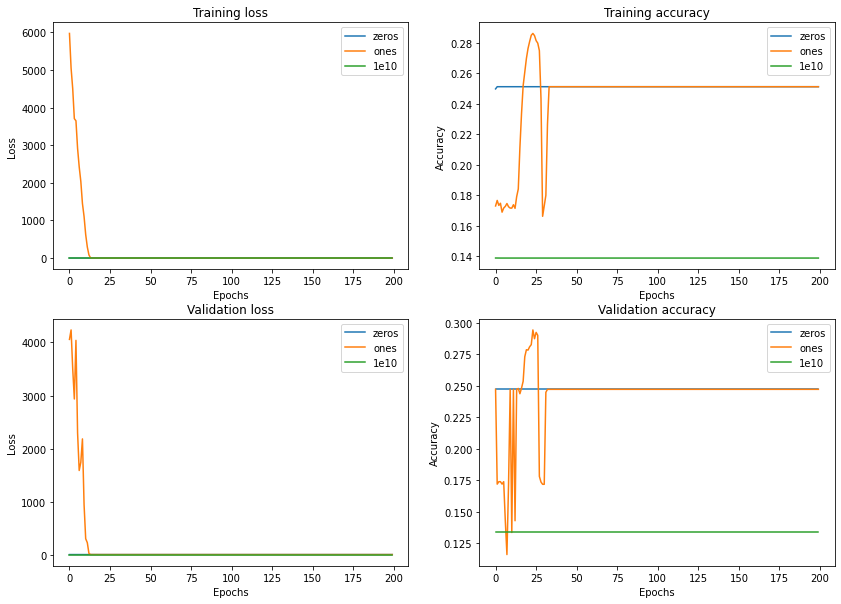

In [ ]:
colors_lst = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
i = 0
for history in all_history:
    initializer = history[0]
    color = colors_lst[i]
    train_loss, train_acc = history[1]['loss'], history[1]['accuracy']
    val_loss, val_acc = history[1]['val_loss'], history[1]['val_accuracy']
    
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training loss')
    axes[0, 0].plot(train_loss, color=color, label=initializer)

    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Accuracy')
    axes[0, 1].set_title('Training accuracy')
    axes[0, 1].plot(train_acc, color=color, label=initializer)

    axes[1, 0].set_xlabel('Epochs')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].set_title('Validation loss')
    axes[1, 0].plot(val_loss, color=color, label=initializer)

    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].set_title('Validation accuracy')
    axes[1, 1].plot(val_acc, color=color, label=initializer)

    i += 1

axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend()

plt.show()